# **Introduction**

Dota2 is one the most famous online games. There are a lot champions or heroes in the game. Heroes have properties like strength,ability,intelligent,health.Hence, we 
can make and analyze them and extrapolate a conclusion.

<font color = 'blue'> 
Content:
   
1.[What kind of hereos we have](#1)
    
2.[Which kind has how many heroes are there in kinds?](#2) 

3.[Category of hereos?](#3) 

4.[Compare The Tank and Attacker Champions Properties](#4)
    
5.[Basic Analysis in Properties](#5)

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/var/folders/k2/p_937gq11md2dyq_pjv1qn200000gp/T/ipykernel_1955/1609478287.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [16]:
dt = pd.read_csv("/Users/utkarsh/Desktop/study/iitj_mtech_ai/DV/Project/dota_heroes728.csv")

In [17]:
dt2 = pd.read_csv("/Users/utkarsh/Desktop/study/iitj_mtech_ai/DV/Project/hero_roles_728.csv")
abc = pd.read_csv("/Users/utkarsh/Desktop/study/iitj_mtech_ai/DV/Project/hero_category_728.csv")

<a id = "1"></a><br>
# 1. What kind of hereos we have
1. Carries
2. Supports
3. Nukers
4. Disablers
5. Junglers
6. Durable
7. Escape
8. Pushers
9. Initiators

<a id = "2"></a><br>
# Which kind has how many heroes are there in kinds? 

In [18]:
dt2.describe()[0:1]

,Carries,Supports,Nukers,Disablers,Junglers,Durable,Escape,Pushers,Initiators
count,66,44,87,90,15,48,50,29,54


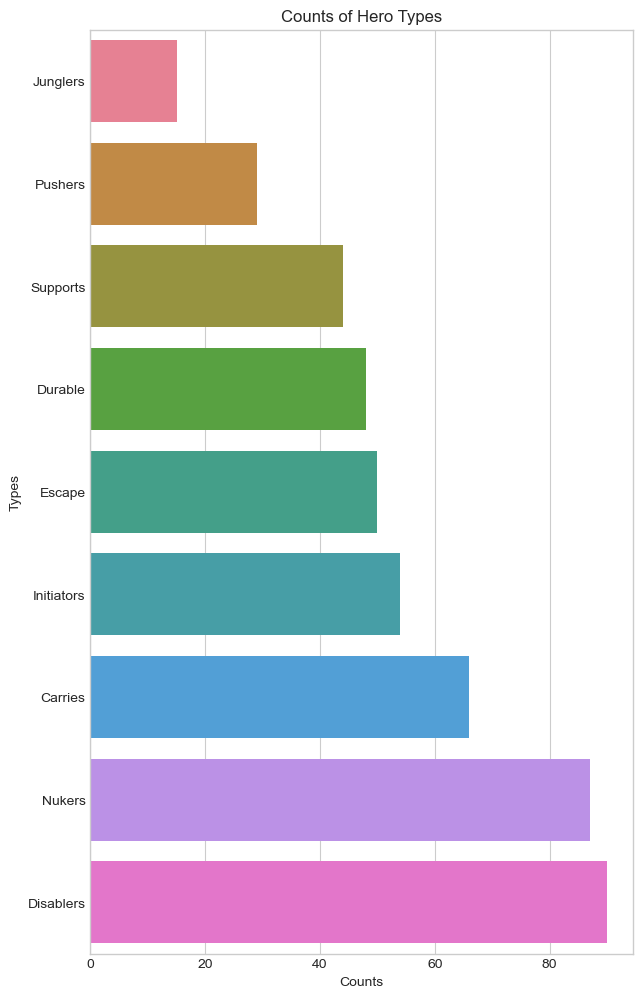

In [19]:
values = list(dt2.count())
types = list(dt2.columns)
dataframe = pd.DataFrame({"Kinds": types, "Counts": values})
index = dataframe.Counts.sort_values(ascending = True).index.values
sorted_data = dataframe.reindex(index)

plt.figure(figsize = (7,12))
sns.barplot(x = sorted_data["Counts"], y = sorted_data["Kinds"], palette = "husl")
plt.xlabel("Counts")
plt.ylabel("Types")
plt.title("Counts of Hero Types")
plt.show()

<a id = "3"></a><br>
# Categories Of Hereos 

In [20]:
values = dt["Gib type"].value_counts()
print(values)

Default     76
Ethereal    19
Goo          7
Motor        4
Ice          4
Fire         3
Electric     3
Stone        2
Wood         2
Name: Gib type, dtype: int64


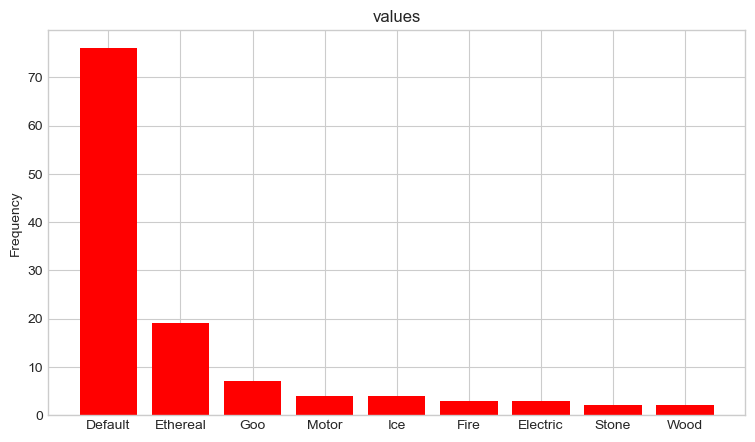

In [21]:
values = dt["Gib type"].value_counts()
plt.figure(figsize = (9,5))
plt.bar(values.index, values,color = 'r')
plt.ylabel("Frequency")
plt.title("values")
plt.show()

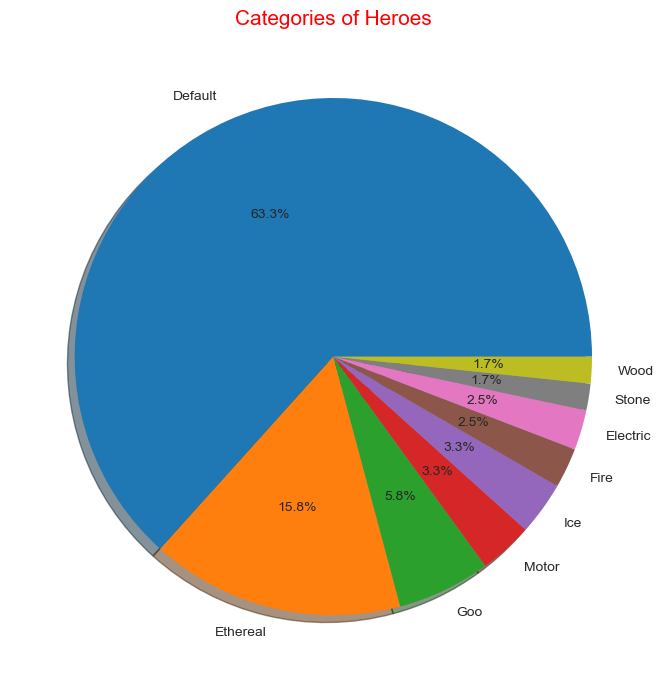

In [22]:
types = dt["Gib type"].value_counts().index
explode = [0,0,0,0,0,0,0,0,0] #oranlar
sizes = dt["Gib type"].value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = types, autopct = '%1.1f%%',shadow = True)
plt.title("Categories of Heroes", color = "red", fontsize = 15)
plt.tight_layout()
plt.show()

<a id = "5"></a><br>
# Basic Analysis in Properties

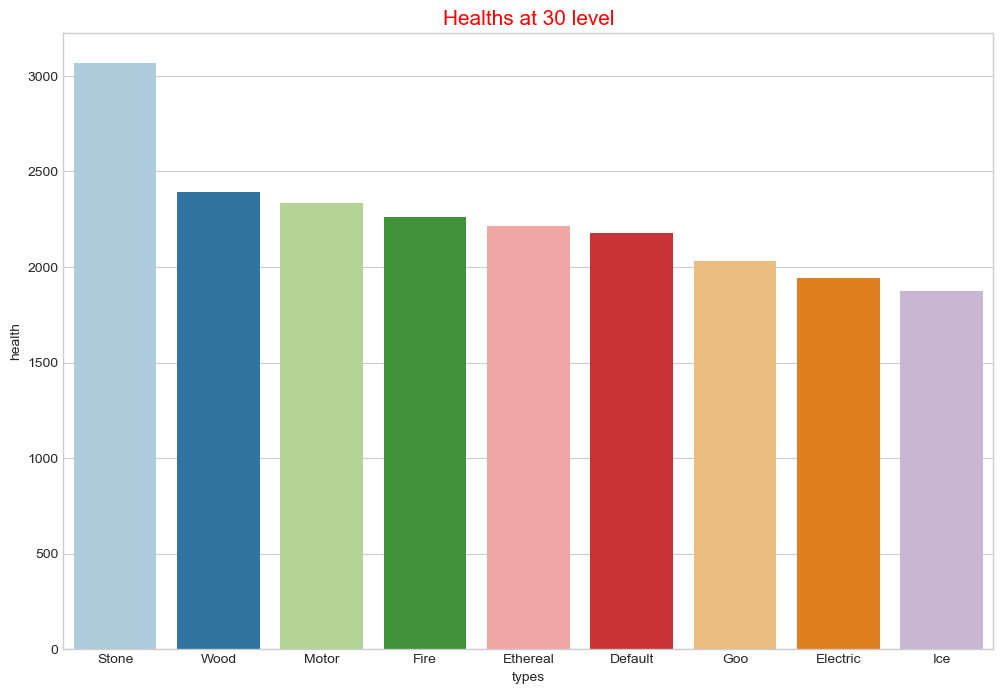

In [23]:
kinds = list(dt["Gib type"].unique())
health_30lvl = []
for i in kinds:
    x = dt[dt["Gib type"] == i]
    health = sum(x.Health_lvl30)/len(x.Health_lvl30)
    health_30lvl.append(health)

dataframe = pd.DataFrame({"types": kinds,"health": health_30lvl})
index = (dataframe.health.sort_values(ascending = False)).index.values
sorted_data = dataframe.reindex(index)


plt.figure(figsize=(12,8))
sns.barplot(x = sorted_data.types, y = sorted_data.health,palette = "Paired")
plt.title("Healths at 30 level", fontsize = 15, color = "red")
plt.show()

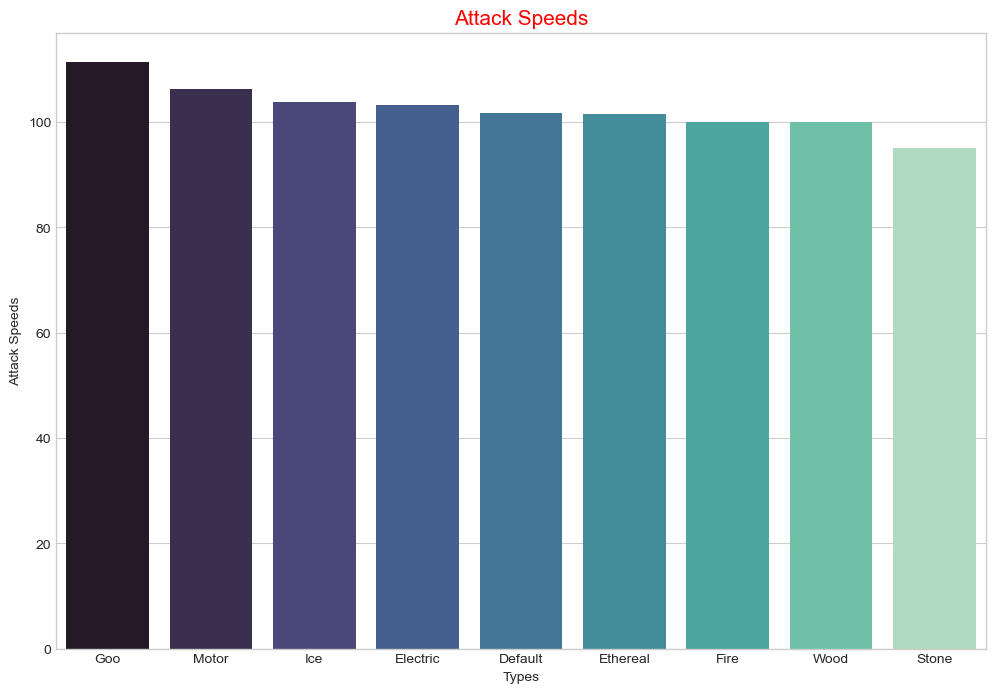

In [24]:
types = list(dt["Gib type"].unique())
attack_speed = []
for i in types:
    x = dt[dt["Gib type"] == i]
    attack_s = sum(x["Attack speed"]) / len(x["Attack speed"])
    attack_speed.append(attack_s)

dataFrame = pd.DataFrame({"Types":types, "Attack Speeds":attack_speed})
new_index = (dataFrame["Attack Speeds"].sort_values(ascending = False)).index.values
sorted_values = dataFrame.reindex(new_index)


plt.figure(figsize = (12,8))
sns.barplot(x = sorted_values["Types"], y = sorted_values["Attack Speeds"], palette = "mako")
plt.title("Attack Speeds",fontsize = 15, color = "red")
plt.show()

***Heroes legs counts vs Heroes properties***

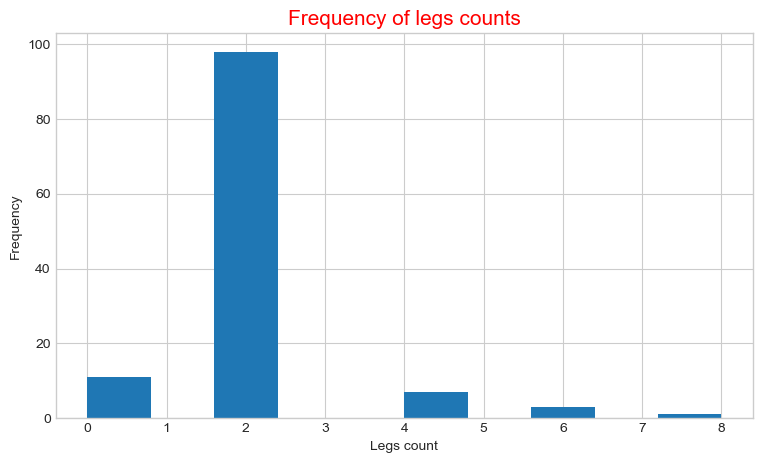

In [25]:
plt.figure(figsize = (9,5))
plt.hist(dt.Legs)
plt.xlabel("Legs count")
plt.ylabel("Frequency")
plt.title("Frequency of legs counts",fontsize = 15, color = "red")
plt.show()

In [26]:
dt3 = pd.DataFrame(dt[["Gib type","Magic resistance", "Movement speed", "Attack speed","Att/sec_base","Turn rate",
       "Vision range", "Attack range", "Projectile speed", "Attack animation",
       "Base attack time", "Damage block", "Collision size"]].groupby(["Gib type"], as_index = False).mean())
dt3

/var/folders/k2/p_937gq11md2dyq_pjv1qn200000gp/T/ipykernel_1955/3339140332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt3 = pd.DataFrame(dt[["Gib type","Magic resistance", "Movement speed", "Attack speed","Att/sec_base","Turn rate",


,Gib type,Movement speed,Attack speed,Att/sec_base,Turn rate,Attack range,Base attack time,Damage block,Collision size
0,Default,302.828947,101.644737,0.603947,0.604605,341.776316,1.693421,4.210526,22.947368
1,Electric,293.333333,103.333333,0.610000,0.633333,445.000000,1.700000,0.000000,24.000000
2,Ethereal,301.315789,101.578947,0.601579,0.594737,369.736842,1.700000,2.947368,24.000000
3,Fire,291.666667,100.000000,0.603333,0.700000,448.333333,1.666667,2.666667,24.000000
4,Goo,287.142857,111.428571,0.648571,0.585714,292.857143,1.728571,4.571429,24.000000
5,Ice,286.250000,103.750000,0.612500,0.525000,562.500000,1.700000,0.000000,24.000000
6,Motor,301.250000,106.250000,0.627500,0.600000,291.250000,1.700000,4.000000,24.000000
7,Stone,295.000000,95.000000,0.560000,0.550000,150.000000,1.700000,8.000000,24.000000
8,Wood,285.000000,100.000000,0.560000,0.550000,375.000000,1.800000,4.000000,24.000000


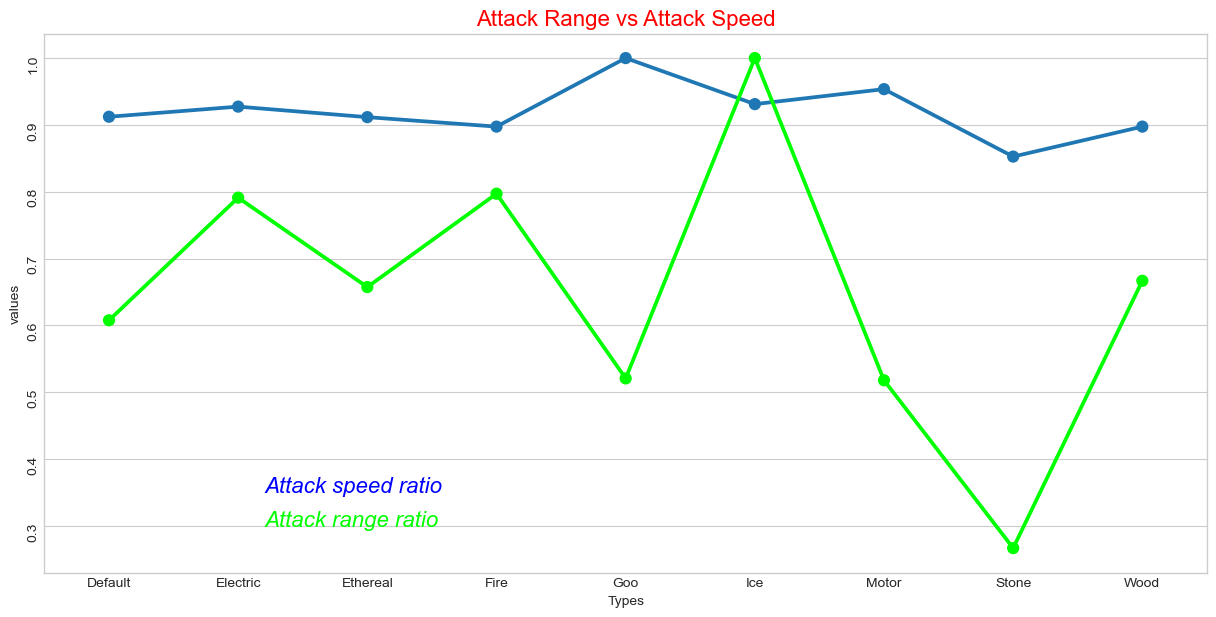

In [27]:
dt3["Attack Range"] = dt3["Attack range"] / max(dt3["Attack range"])
dt3['Attack Speed'] = dt3["Attack speed"] / max(dt3["Attack speed"])


plt.subplots(figsize= (15,7))
sns.pointplot(x = 'Gib type',y = 'Attack Speed', data = dt3)
sns.pointplot(x = "Gib type", y = "Attack Range", data = dt3, color = "lime")
plt.text(1.2,0.35,"Attack speed ratio",color = "blue",fontsize = 16, style = "italic")
plt.text(1.2,0.3,"Attack range ratio",color = "lime",fontsize = 16, style = "italic")
plt.yticks(rotation = 90)
plt.ylabel("values")
plt.xlabel("Types")
plt.title("Attack Range vs Attack Speed",fontsize = 16, color = "red")
plt.show()

In [28]:
# Legs vs Movement speed
ay = pd.DataFrame(dt[["Legs", "Movement speed"]].groupby(["Legs"], as_index = False).mean().sort_values(by="Movement speed", ascending = False))
ay

,Legs,Movement speed
2,4,305.714286
3,6,305.000000
1,2,300.561224
0,0,293.636364
4,8,275.000000


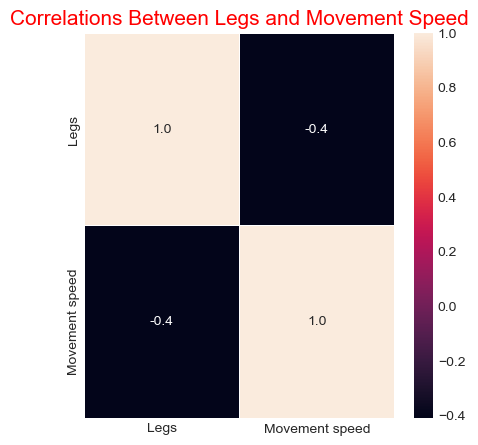

In [29]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(ay.corr(), annot = True,linewidths = 0.5,fmt = ".1f",ax = ax)
plt.title("Correlations Between Legs and Movement Speed", fontsize = 15, color = "red")
plt.show()

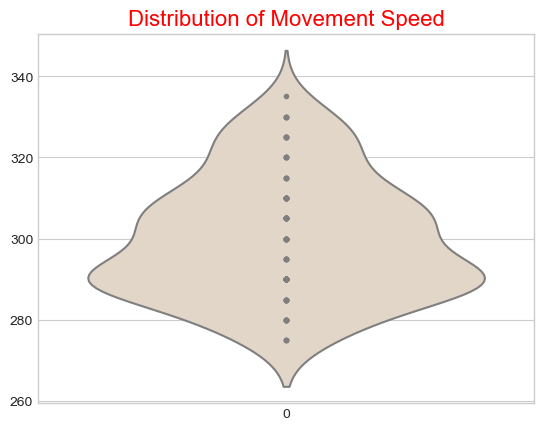

In [30]:
pal = sns.cubehelix_palette(2, rot = .5, dark = .3)
sns.violinplot(data = dt["Movement speed"], palette = pal, inner = "points")
plt.title("Distribution of Movement Speed", fontsize = 16, color = "red")
plt.show()